In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Intercept (β0): 56862.5775160795
GrLivArea (β): 100.63689524931347
BedroomAbvGr (β): -26645.53251637677
TotalBathrooms (β): 27083.20771295673
RMSE: 53371.56024906053
R² Score: 0.6286307301050612


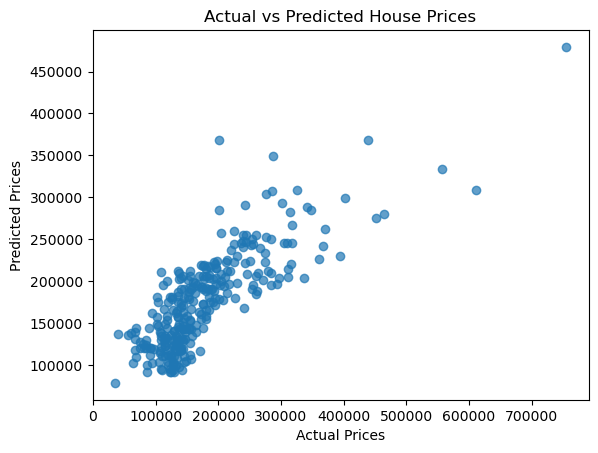

Predicted Price for new house: 232366.1858914896


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("train.csv")

# Select relevant features
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
X = df[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y = df['SalePrice']

# Handle missing values (if any)
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Intercept & coefficients
print("Intercept (β0):", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} (β): {coef}")

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Test with new house data
new_house = pd.DataFrame([[2000, 3, 2]],
                        columns=['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']) # 2000 sq.ft, 3 bedrooms, 2 bathrooms
predicted_price = model.predict(new_house)
print("Predicted Price for new house:", predicted_price[0])